# Auswertung B3.1

In [1]:
using CSV
using DataFrames
using Plots
using LaTeXStrings
using Statistics

## Rechnungen zur Vorbereitung

In [2]:
T_12 = 30.08 * 365.25 * 24 * 60 * 60 # s

9.492526079999999e8

In [3]:
log(2) / T_12

7.302030826339804e-10

## 0: Rohe Messdaten

##### Sample 6, 500 V, 45min:

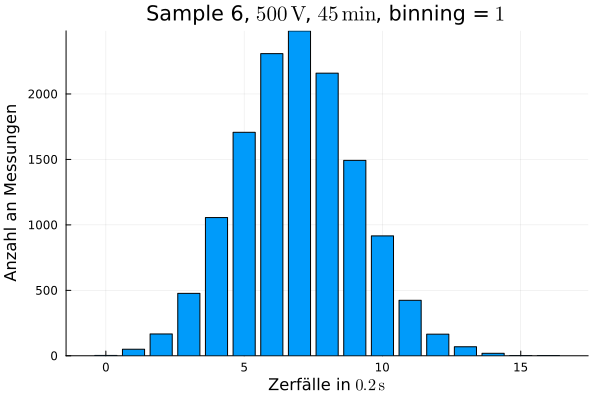

In [4]:
# ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]
plot(bar(zerfälle_6_500_1,anzahl_6_500_1,label=""), title=L"Sample 6, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

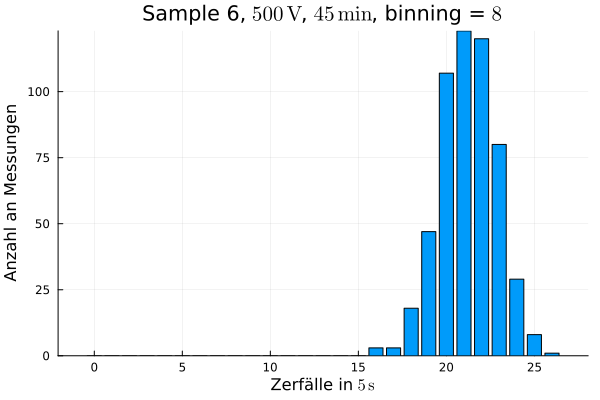

In [5]:
# ΔT = 5s, binning = 8
zerfälle_6_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
anzahl_6_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1]
plot(bar(zerfälle_6_500_2,anzahl_6_500_2,label=""), title=L"Sample 6, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

##### Sample 6, 600V, 45min:

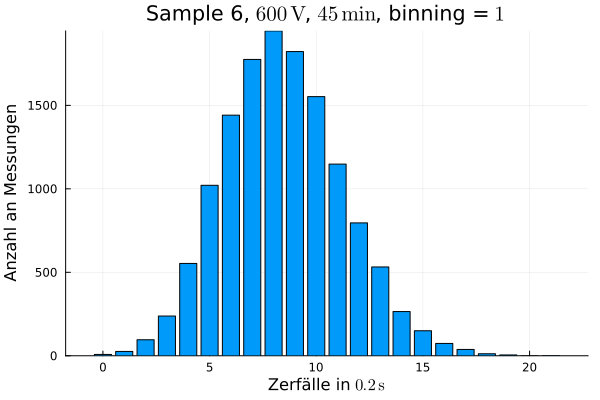

In [6]:
# ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]
plot(bar(zerfälle_6_600_1,anzahl_6_600_1,label=""), title=L"Sample 6, $600\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

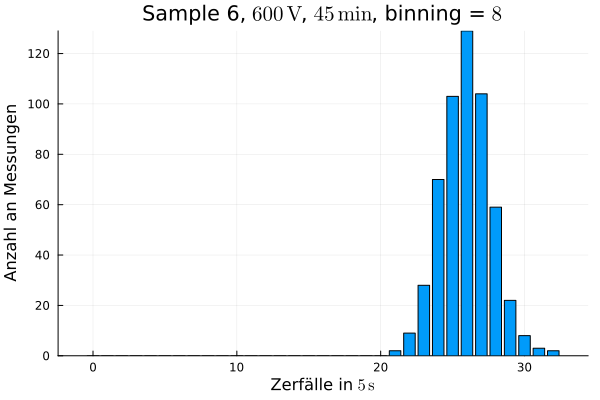

In [7]:
# ΔT = 5s, binning = 8
zerfälle_6_600_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2]
plot(bar(zerfälle_6_600_2,anzahl_6_600_2,label=""), title=L"Sample 6, $600\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

##### Sample 6+7, 500V, 45min:

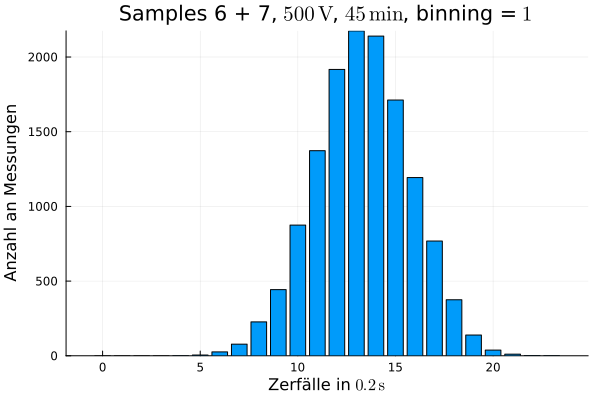

In [8]:
# ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]
plot(bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label=""), title=L"Samples 6 + 7, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $1$")
xlabel!(L"Zerfälle in $0.2\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

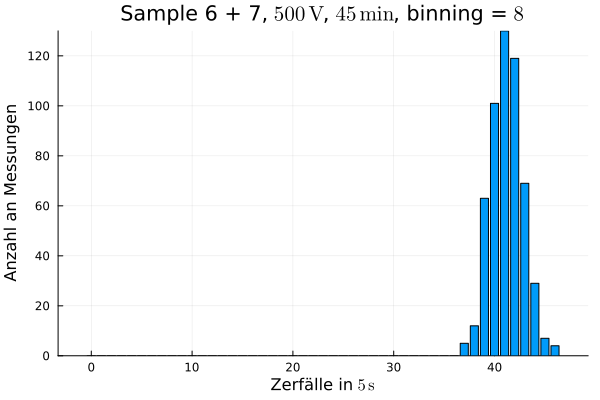

In [9]:
# ΔT = 5s, binning = 8
zerfälle_6und7_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
    35,36,37,38,39,40,41,42,43,44,45,46]
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4]
plot(bar(zerfälle_6und7_500_2,anzahl_6und7_500_2,label=""), title=L"Sample 6 + 7, $500\mathrm{\,V}$, $45\mathrm{\,min}$, binning = $8$")
xlabel!(L"Zerfälle in $5\mathrm{\,s}$")
ylabel!("Anzahl an Messungen")

## 1: Poisson-Verteilung

In [10]:
# Poissonverteilung:
lambda = 10 # (Testwert) Mittelwert lambda
N = 10 # (Testwert) Normierungsfaktor N = Summe der Höhe aller Balken
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

P (generic function with 1 method)

Sample 6, 500V, 45min, ΔT = 0.2s, binning = 1:

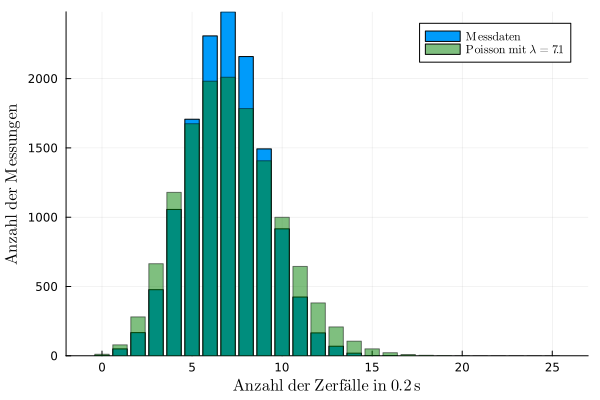

In [11]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
lambda = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

#Plot
poisson1 = bar(zerfälle_6_500_1,anzahl_6_500_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [12]:
savefig(poisson1, "../../media/B3.1/poisson1.pdf");

Sample 6, 600V, 45min, ΔT = 0.2s, binning = 1:

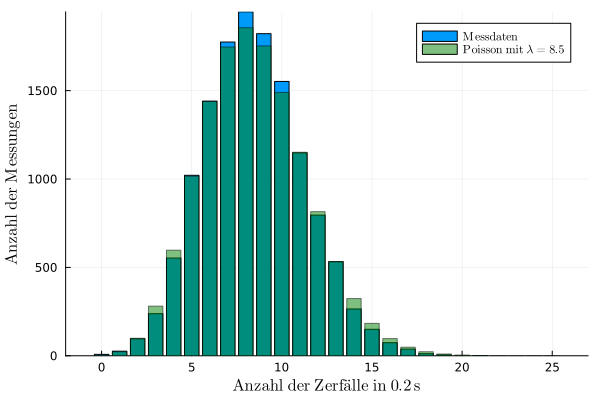

In [13]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
lambda = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
poisson2 = bar(zerfälle_6_600_1,anzahl_6_600_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [14]:
savefig(poisson2, "../../media/B3.1/poisson2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 0.2s, binning = 1:

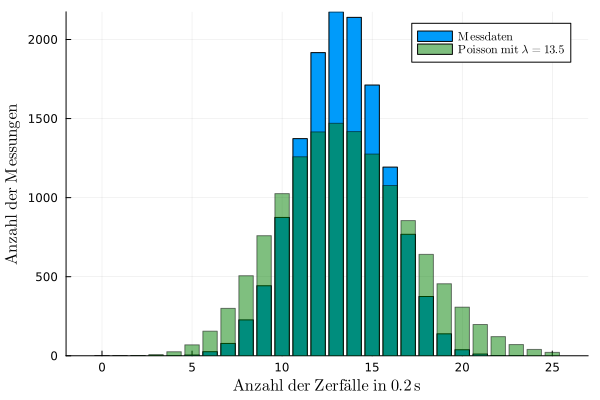

In [15]:
# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
lambda = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
poisson3 = bar(zerfälle_6und7_500_1,anzahl_6und7_500_1,label=L"\mathrm{Messdaten}")
bar!(0:25,P,color=:green,label=LaTeXString("\$\\mathrm{Poisson\\ mit\\ } \\lambda = $lambda\$"),alpha=0.5)
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [16]:
savefig(poisson3, "../../media/B3.1/poisson3.pdf");

Alle Poisson-Verteilungen zusammen:

In [17]:
LaTeXString("\\lambda = $lambda, \\mathrm{Quelle\\ Nr.\\ }6, 500\\mathrm{\\,V}")

L"\lambda = 13.5, \mathrm{Quelle\ Nr.\ }6, 500\mathrm{\,V}"

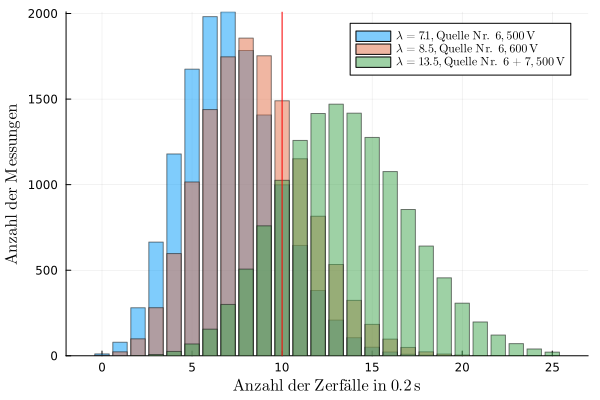

In [18]:
# Messdaten mit ΔT = 0.2, binning = 1
zerfälle_6_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
anzahl_6_500_1 = [3,50,167,477,1056,1707,2308,2482,2159,1493,916,424,165,69,19,2,2]

# Passende Poissonverteilung:
lambda = 7.1
N = sum(anzahl_6_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

#Plot
allePoisson = bar(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Quelle\\ Nr.\\ }6, 500\\mathrm{\\,V}\$"),alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6_600_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
anzahl_6_600_1 = [8,26,96,238,553,1021,1441,1775,1946,1822,1552,1148,796,532,265,150,74,38,12,5,0,1]

# Passende Poissonverteilung:
lambda = 8.5
N = sum(anzahl_6_600_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
bar!(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Quelle\\ Nr.\\ }6, 600\\mathrm{\\,V}\$"),alpha=0.5)

# Messdaten mit ΔT = 0.2s, binning = 1
zerfälle_6und7_500_1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
anzahl_6und7_500_1 = [0,0,0,0,1,5,26,78,227,443,875,1373,1917,2175,2140,1712,1193,768,375,139,38,11,2,1]

# Passende Poissonverteilung:
lambda = 13.5
N = sum(anzahl_6und7_500_1)
P(n) = N * lambda^big(n) * exp(-lambda) / factorial(big(n))

# Plot
bar!(0:25,P,label=LaTeXString("\$\\lambda = $lambda, \\mathrm{Quelle\\ Nr.\\ }6+7, 500\\mathrm{\\,V}\$"),alpha=0.5)

xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }0.2\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

# Plot Faustregel
vline!([10], color=:red, label="")

In [19]:
savefig(allePoisson, "../../media/B3.1/allePoisson.pdf");

## 2: Gaußverteilung

In [20]:
# Gaußverteilung
z_strich = 10 # (Testwert) gemessene Zählrate z_strich (hängt von Sample und Spannung ab)
n = 8 # Binning (für alle Messungen gleich)
Δt = 5 # (für alle Messungen gleich)
m = z_strich * Δt / n # Mittelwert m
F = 10 # (Testwert) Normierungsfaktor F = Summe der Höhe aller Balken
G(x) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

G (generic function with 1 method)

Sample 6, 500V, 45min, ΔT = 5s, binning = 8:

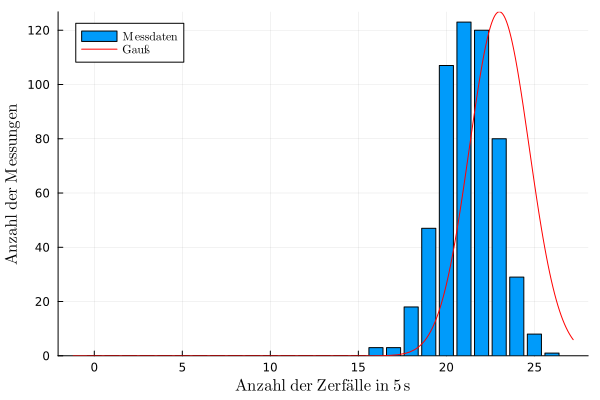

In [21]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
anzahl_6_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,18,47,107,123,120,80,29,8,1]

# Passende Gaußverteilung:
z_strich = 11044/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_500_2)
G(x) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß1 = plot(bar(zerfälle_6_500_2,anzahl_6_500_2,label=L"\mathrm{Messdaten}"), legend=:topleft)
plot!(G,color=:red,label=L"\mathrm{Gauß}")

xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [22]:
[m,F,z_strich]

3-element Vector{Float64}:
  23.008333333333333
 539.0
  36.81333333333333

In [23]:
savefig(gauß1, "../../media/B3.1/gauss1.pdf");

Sample 6, 600V, 45min, ΔT = 5s, binning = 8:

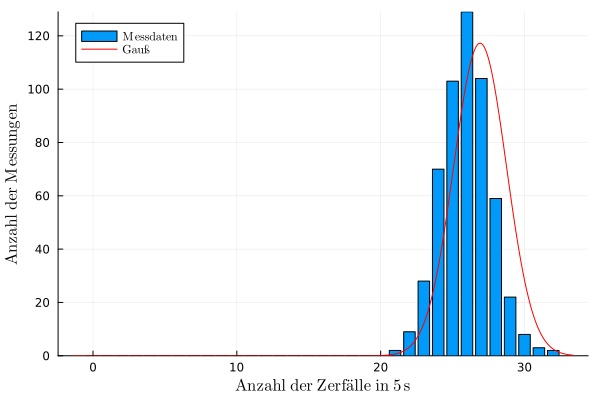

In [24]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6_600_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
anzahl_6_600_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9,28,70,103,129,104,59,22,8,3,2]

# Passende Gaußverteilung:
z_strich = 12917/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6_600_2)
G(x) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß2 = plot(bar(zerfälle_6_600_2,anzahl_6_600_2,label=L"\mathrm{Messdaten}"), legend=:topleft)
plot!(G,color=:red,label=L"\mathrm{Gauß}")
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [25]:
[m,F,z_strich]

3-element Vector{Float64}:
  26.910416666666666
 539.0
  43.056666666666665

In [26]:
savefig(gauß2, "../../media/B3.1/gauss2.pdf");

Sample 6 + 7, 500V, 45min, ΔT = 5s, binning = 8:

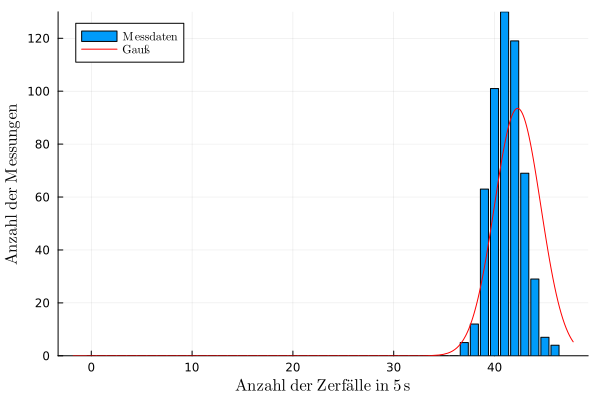

In [27]:
# Messdaten mit ΔT = 5s, binning = 8
zerfälle_6und7_500_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
    35,36,37,38,39,40,41,42,43,44,45,46]
anzahl_6und7_500_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,63,101,130,119,69,
    29,7,4]

# Passende Gaußverteilung:
z_strich = 20300/300 # Aus Kurzmessung
m = z_strich * Δt / n
F = sum(anzahl_6und7_500_2)
G(x) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))

# Plot
gauß3 = plot(bar(zerfälle_6und7_500_2,anzahl_6und7_500_2,label=L"\mathrm{Messdaten}"), legend=:topleft)
plot!(G,color=:red,label=L"\mathrm{Gauß}")
xlabel!(L"\mathrm{Anzahl\ der\ Zerfälle\ in\ }5\mathrm{\,s}")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [28]:
[m,F,z_strich]

3-element Vector{Float64}:
  42.29166666666667
 539.0
  67.66666666666667

In [29]:
savefig(gauß3, "../../media/B3.1/gauss3.pdf");

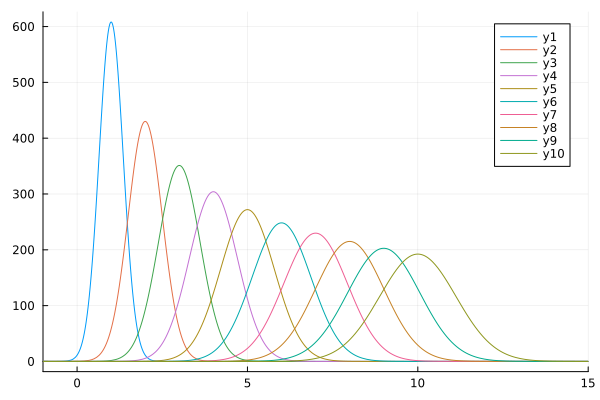

In [30]:
G(x) = 1/sqrt(2 * pi * m) * F * sqrt(n) * exp(- (x - m)^2 / (2 * m / n))
m = 1
plot(G, xaxis=[-1,15])
m=2
plot!(G)
m=3
plot!(G)
m=4
plot!(G)
m=5
plot!(G)
m=6
plot!(G)
m=7
plot!(G)
m=8
plot!(G)
m=9
plot!(G)
m=10
plot!(G)

## 3: Intervall-Verteilung

##### Plotten der Messwerte

In [31]:
interval0 = CSV.read("sample_6/500V_45min/interval_0.001_1.csv", DataFrame)
interval1 = CSV.read("sample_6/500V_45min/interval_0.001_2.csv", DataFrame)
interval2 = CSV.read("sample_6/500V_45min/interval_0.001_3.csv", DataFrame)
;

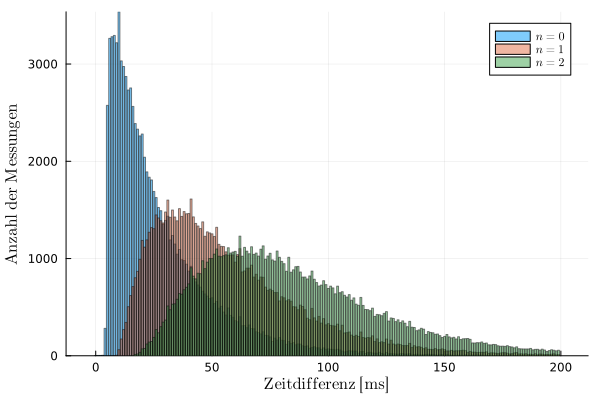

In [32]:
# Sample 6, 500V, 45min
interval = bar(interval0[1:200, :intervall], interval0[1:200, :count], alpha=0.5, label=L"n = 0")
bar!(interval1[1:200, :intervall], interval1[1:200, :count], alpha=0.5, label=L"n = 1")
bar!(interval2[1:200, :intervall], interval2[1:200, :count], alpha=0.5, label=L"n = 2")
xlabel!(L"\mathrm{Zeitdifferenz\ } [\mathrm{ms}]")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [33]:
savefig(interval, "../../media/B3.1/interval.pdf");

##### Fitten für n=0
- Alle Messwerte im Bereich t $\in$ [0,totzeit] abschneiden und den Rest fitten

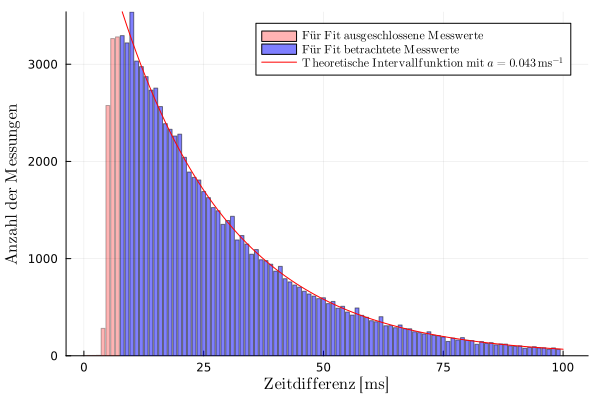

In [34]:
# Plot
totzeitIndex = 8
intervalFit = bar(interval0[1:totzeitIndex, :intervall], interval0[1:totzeitIndex, :count],
    color=:red, alpha=0.3, label=L"\mathrm{Für\ Fit\ ausgeschlossene\ Messwerte}", title="", legend=:topright)
bar!(interval0[(totzeitIndex+1):100, :intervall],
    interval0[(totzeitIndex+1):100, :count], color=:blue, alpha=0.5, label=L"\mathrm{Für\ Fit\ betrachtete\ Messwerte}", title="")

# Intervallverteilung mit skaliertem N (für n = 0)
a = 0.043 # Fitparameter zwischen 0.042 und 0.044
T = 2699.959473 # s Gesamtdauer der Messung = 45 min oder letzter gemessener Zeitpunkt?
N = 1000*T * a # Normierungskonstante
I(t) = N * a * exp(- a * t)
plot!(totzeitIndex:100,I,label=LaTeXString("\$\\mathrm{Theoretische\\ Intervallfunktion\\ mit\\ } a = $a \\mathrm{\\,ms^{-1}}\$"), color=:red)

xlabel!(L"\mathrm{Zeitdifferenz\ } [\mathrm{ms}]")
ylabel!(L"\mathrm{Anzahl\ der\ Messungen}")

In [35]:
savefig(intervalFit, "../../media/B3.1/intervalFit.pdf");

## 4: Totzeit

a = a_strich / (1 - a_strich * tau) <=> tau = 1/a_strich - 1/a

In [36]:
a_strich = 11044/300 * 10^(-3) # ms Gemessene Zählrate aus Kurzzeitmessung
tau = 1/a_strich - 1/a # ms

3.908257035283807

## 5: Aufgaben zum  $\chi^2$–Test
Daten einlesen

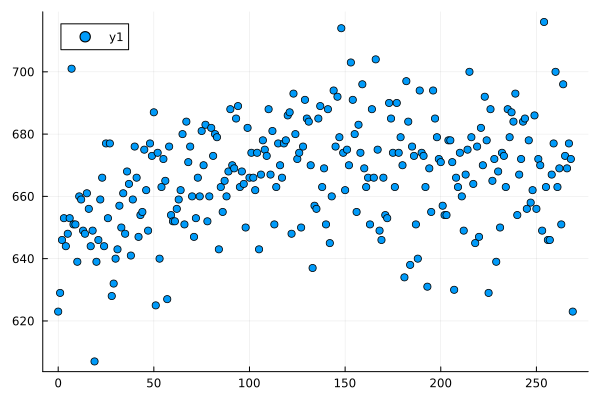

In [37]:
data = CSV.File("sample_6_7/500V_45min/divide_10.csv")
scatter(0:length(data), data.Zerfälle_in_10_sec)

In [38]:
x_data = 0:50
decays = data.Zerfälle_in_10_sec[x_data.+1]

avg_decays = mean(decays)

653.8039215686274

In [39]:
std(decays)

16.509415020336895

## 1. Hypothesen
Zeigen Sie zeichnerisch, was die Hypothesen a, b und c besagen.

- a: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte.
- b: Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der 51 Messwerte minus 10%.
- c: Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei 1.

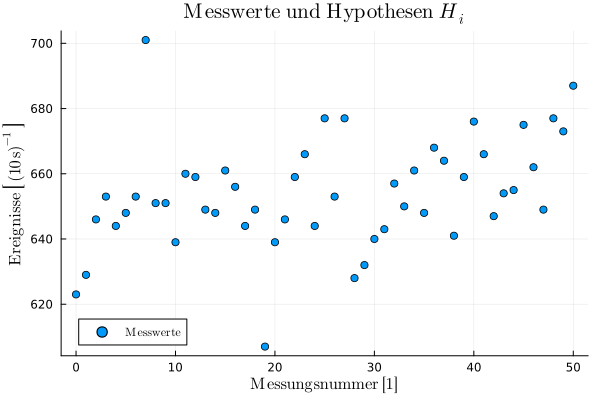

In [40]:
scatter(x_data, decays, label=L"\mathrm{Messwerte}", legend=:bottomleft)

title!(L"\mathrm{Messwerte\ und\ Hypothesen\ } H_i")
xlabel!(L"\mathrm{Messungsnummer}\ [1]")
ylabel!(L"\mathrm{Ereignisse}\ \left[(10\,\mathrm{s})^{-1}\right]")

Hypothese $H_1$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte."

Diese Hypothese besagt, jeder erwartete Zählmenge $n_1(i)$ sei gleich dem Mittelwert der $51$ Messungen $n_i$.

$$
	\bar x = \bar n
$$
$$
    n_1(i) = \frac{1}{51} \sum_{i=1}^{51} n_i
$$
$$
	\chi^2_1 = \sum_i \frac{(n_i-\bar n)^2}{\bar n}
$$

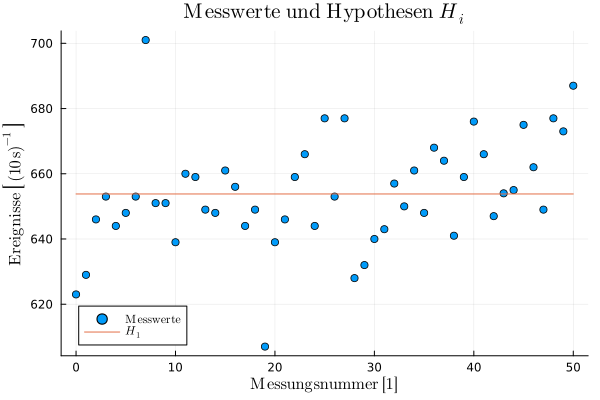

In [41]:
h1_results = fill(avg_decays, length(x_data))

plot!(
    x_data,
    h1_results,
    label=L"H_1"
)

Hypothese $H_2$: "Die Präparatstärke ist konstant im betrachteten Zeitraum und gleicht dem Mittelwert der $51$ Messwerte minus $10\%$."

Dies bedeutet, dass die erwarteten Zählungen $n_2(i)$ um $10\%$ kleiner als die Zählungen nach $H_1$ sein müssen.

$$
    n_2(i) = \frac{9}{10}\cdot n_1(i)
$$
$$
	\chi^2_2 = \sum_i \frac{(n_i-0.9\,\bar n)^2}{0.9\,\bar n}
$$

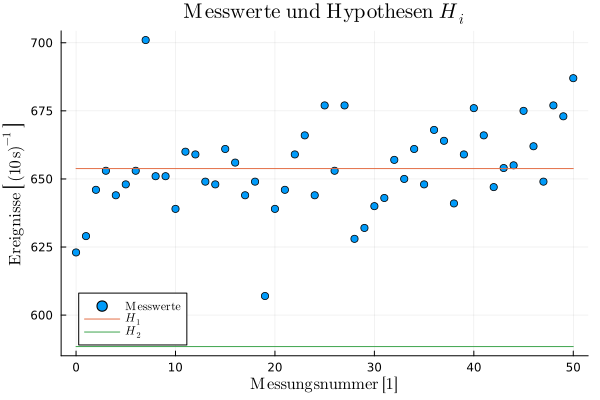

In [42]:
plot!(
    x_data,
    0.9 .* h1_results,
    label=L"H_2"
)

Hypothese $H_3$: "Die Präparatstärke nimmt im betrachteten Zeitraum linear mit der Zeit ab (als erste Näherung eines exponentiellen Abfalls). Die Anfangszählrate ist der Mittelwert, und der Abfall von einer Messung zur anderen sei $1$."

Die erwarteten Ereignisse starten demnach bei $n_1(0)$ und fallen dann linear mit einer Steigung von $1$ ab.

$$
    n_3(i) = n_1(0) - i
$$
$$
	\chi^2_3 = \sum_i \frac{(n_i-(n - i))^2}{(n - i)}
$$

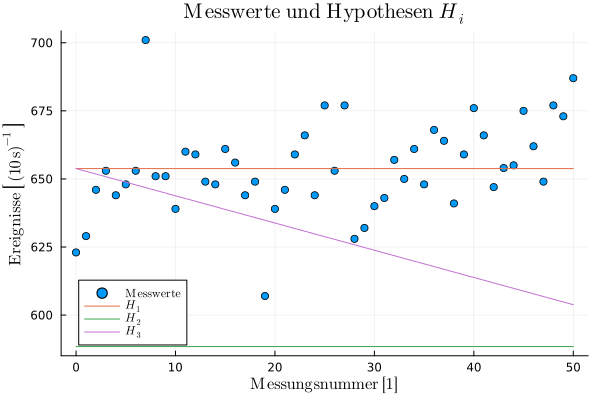

In [43]:
plot!(
    x_data,
    h1_results .- x_data,
    label=L"H_3"
)

In [44]:
savefig("../../media/B3.1/Hypothesen_plot.svg")
savefig("../../media/B3.1/Hypothesen_plot.png");

Man Erkennt, dass $H_1$ die Messwerte am besten beschreibt.

## 2. Hypothesentest
Nun werden die drei Hypothesen $H_i$ mithilfe des $\chi^2$–Tests geprüft. Hierzu werden $51$ Messwerte aus der $45\,\mathrm{min}$-Messung beider Proben gewählt, deren Zählungen über $10\,\mathrm s$ gemittelt werden. Dies wird sowohl für die nicht-totzeitkorrigierten als auch für die totzeitkorrigierten Daten durchgeführt.

Durch die Bildung des Mittelwertes gibt es noch $50$ statistische Freiheitsgrade. Dadurch können die erlaubten Grenzen für $\chi^2$ für ein System mit $50$ Freiheitsgraden und einer Signifikanz von $5\%$ verwendet werden $[6]$.

$$
	\chi^2_\mathrm{min} = 32.357 \\
$$
$$
	\chi^2_\mathrm{max} = 71.420
$$

### $H_1$
$$
    \chi^2_1 = \sum_i \frac{(x_i-\bar x)^2}{\bar x}
$$

In [45]:
chi_squared_1 = sum((decays .- avg_decays).^2 ./ avg_decays)

20.84422984644914

In [46]:
(1 - chi_squared_1 / 32.357)*100

35.58046219844504

### $H_2$
$$
	\chi^2_2 = \sum_i \frac{(x_i-0.9\,\bar x)^2}{0.9\,\bar x}
$$

In [47]:
chi_squared_2 = sum((decays .- 0.9*avg_decays).^2 ./ (0.9*avg_decays))

393.6491442738329

In [48]:
chi_squared_2 / 71.420

5.511749429765232

### $H_3$
$$
	\chi^2_3 = \sum_i \frac{(x_i-(\bar{n} - i))^2}{(\bar{n} - i)}
$$

In [49]:
chi_squared_3 = sum((decays .- (avg_decays .- x_data)).^2 ./ (avg_decays .- x_data))

106.02106295610936

In [50]:
chi_squared_3 / 71.420

1.4844730181477088

Alle drei Hypothesen müssen verworfen werden. $\chi^2_1\approx 21$ ist etwa $36\%$ kleiner als $\chi^2_\mathrm{min}$, daher kann die Hypothese $H_1$ nicht akzeptiert werden. Dies liegt daran, dass die Werte zu gut zu der $H_1$-Hypothese passen, es gibt zu geringe Schwankungen. Wäre die Funktion der theoretischen Werte z.B. gefittet worden, so müsste man annehmen, das "überfittet" wurde.

$\chi^2_2\approx 394$ ist um einen Faktor von ca. $5.5$ zu groß, die Hypothese $H_2$ kann damit sehr sicher abgelehnt werden. $\chi^2_3\approx 106$ ist um einen Faktor von ca. $1.5$ zu groß, sodass auch die Hypothese $H_3$ abgelehnt werden kann.

Aufgrund der Abweichungen kann nicht abschließend gesagt werden, welche Hypothese zutrifft. Allerdings ist es in der grafischen Darstellung ersichtlich, dass ein näherungsweise konstanter Wert durchaus möglich ist, was $H_1$ unterstützt.

Würde man Pearsons $\chi^2$-Test durchführen, so würde man nur einen $\chi_\mathrm{P, max}^2 = 67.505$-Wert zum Vergleich verwenden. $[6]$

Damit wird die Hypothese $H_1$ bekräftigt und die Hypothesen $H_2$ und $H_3$ abgelehnt.

Da kein Fitting durchgeführt wurde, kann hier der Fehler des Überfittens ausgeschlossen werden. Daher halten wir in dem vorliegenden Experiment den Person-Test für sinnvoller.

### Hypothesentest mit Totzeit
Im Folgenden werden die Hypothesen $H_i$ mit totzeitkorrigierten Daten betrachtet.

$$
	\chi^2_\mathrm{min} = 32.357 \\
$$
$$
	\chi^2_\mathrm{max} = 71.420
$$

In [51]:
decays_corrected = data.Zerfälle_in_10_sec[x_data.+1] .- tau
avg_decays_corrected = mean(decays_corrected)

649.8956645333437

In [52]:
chi_squared_1_corrected = sum((decays_corrected .- avg_decays_corrected).^2 ./ avg_decays_corrected)

20.96958013325394

In [53]:
(1 - chi_squared_1_corrected / 32.357)*100

35.193064458219425

In [54]:
chi_squared_2_corrected = sum((decays_corrected .- 0.9*avg_decays_corrected).^2 ./ (0.9*avg_decays_corrected))

391.5737433836198

In [55]:
chi_squared_2_corrected / 71.420

5.4826903302103025

In [56]:
chi_squared_3_corrected = sum((decays_corrected .- (avg_decays_corrected .- x_data)).^2 ./ (avg_decays_corrected .- x_data))

106.69800513209663

In [57]:
chi_squared_3_corrected / 71.420

1.493951346010874

## 3. Halbwertszeit
Welche Halbwertszeit ergibt sich aus der Hypothese c, wenn Sie einen zeitlichen Abstand der Messungen von 10 Sekunden annehmen als Näherung eines exponentiellen Zerfalls?

Nun soll nach Hypothese $H_3$ die Halbwertszeit $T_{1/2}$ der Proben bestimmt werden. Hierzu wird der exponentielle Zerfall durch eine lineare Kurve beschrieben. Es wird erwartet, dass diese Halbwertszeit deutlich geringer als die ca. $30\,\mathrm{yr}$ der Probe ist.

Dabei wird davon ausgegangen, dass innerhalb der Messdauer $\Delta t=10\,\mathrm{s}$ der Wert $N_0$ um $1$ sinkt. Weiterhin wird die Halbwertszeit nach Gleichung \ref{???} bestimmt. Nach Hypothese $H_3$ ist $N(0)=\bar n$ der Mittelwert der Zählraten.

In [58]:
T_12 = Integer(round(10 * log(2) / log(avg_decays/(avg_decays-1)))) # seconds
println(T_12, " seconds")

T_12_str = string(Integer(round(T_12/3600)), L"\,\mathrm{h}\,", Integer(round(T_12%60)), L"\,\mathrm{min}",)
println(T_12_str)
latexstring(T_12_str)

4528 seconds
1$\,\mathrm{h}\,$28$\,\mathrm{min}$


L"1$\,\mathrm{h}\,$28$\,\mathrm{min}$"

In [59]:
T_12_corr = Integer(round(10 * log(2) / log(avg_decays_corrected/(avg_decays_corrected-1)))) # seconds
println(T_12_corr, " seconds")

T_12_corr_str = string(Integer(round(T_12_corr/3600)), L"\,\mathrm{h}\,", Integer(round(T_12_corr%60)), L"\,\mathrm{min}",)
println(T_12_corr_str)
latexstring(T_12_corr_str)

4501 seconds
1$\,\mathrm{h}\,$1$\,\mathrm{min}$


L"1$\,\mathrm{h}\,$1$\,\mathrm{min}$"